In [1]:
import tensorflow as tf
import numpy as np
import math 

import matplotlib.pyplot as plt

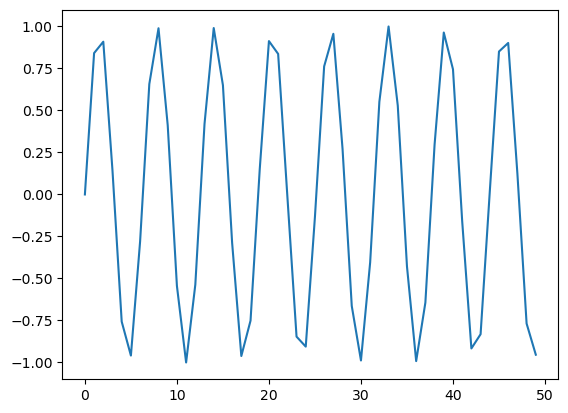

In [2]:
sin_wave = np.array([math.sin(x) for x in np.arange(200)])
plt.plot(sin_wave[:50])

In [3]:

sin_wave = np.array([math.sin(x) for x in np.arange(200)])

X = []
Y = []

seq_len = 50
num_records = len(sin_wave) - seq_len

for i in range(num_records - 50):
    X.append(sin_wave[i:i+seq_len])
    Y.append(sin_wave[i+seq_len])
    
X = np.array(X)
X = np.expand_dims(X, axis=2)

Y = np.array(Y)
Y = np.expand_dims(Y, axis=1)

print(X.shape,Y.shape)

(100, 50, 1) (100, 1)


In [4]:
len(sin_wave)

200

In [5]:
X.shape

(100, 50, 1)

In [6]:
Y.shape

(100, 1)

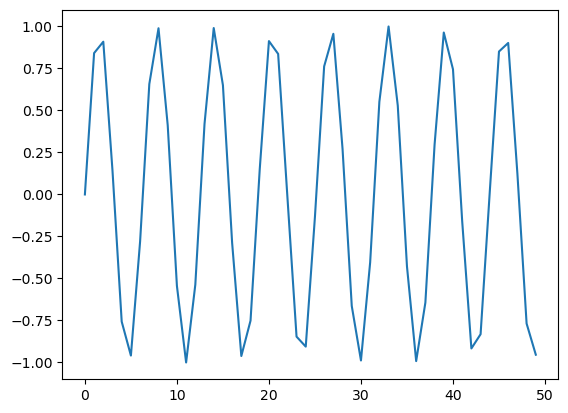

In [7]:
plt.plot(X[0])

Note that we looped for (num_records – 50) because we want to set aside 50 records as our validation data. We can create this validation data now:

In [8]:
X_val = []
Y_val = []

for i in range(num_records - 50, num_records):
    X_val.append(sin_wave[i:i+seq_len])
    Y_val.append(sin_wave[i+seq_len])
    
X_val = np.array(X_val)
X_val = np.expand_dims(X_val, axis=2)

Y_val = np.array(Y_val)
Y_val = np.expand_dims(Y_val, axis=1)

In [9]:
Y_val = np.array(Y_val)

In [10]:
Y_val.shape

(50, 1)

In [11]:
# Y_val = np.array(Y_val)
# Y_val = np.expand_dims(Y_val, axis=1)

In [12]:
Y_val.shape

(50, 1)

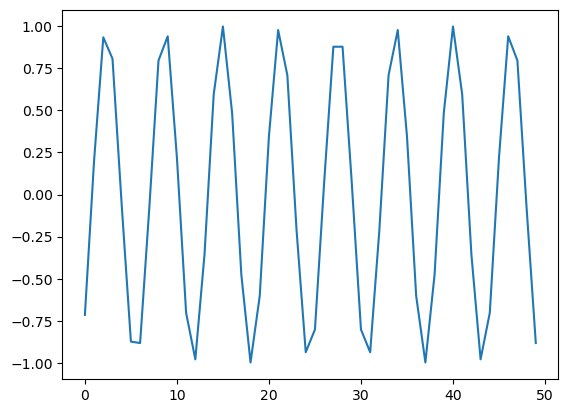

In [13]:
plt.plot(Y_val)

Step 1: Create the Architecture for our RNN model

In [14]:
# Build the RNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(seq_len, 1)),
    tf.keras.layers.SimpleRNN(64, return_sequences=True),
    tf.keras.layers.Dense(1)
])

In [15]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [16]:
x_train=X
y_train=Y

In [17]:
x_train.shape

(100, 50, 1)

In [18]:
x_train[0].shape

(50, 1)

In [19]:
type(x_train[0])

numpy.ndarray

In [20]:
print(x_train[0].tolist())

[[0.0], [0.8414709848078965], [0.9092974268256817], [0.1411200080598672], [-0.7568024953079282], [-0.9589242746631385], [-0.27941549819892586], [0.6569865987187891], [0.9893582466233818], [0.4121184852417566], [-0.5440211108893698], [-0.9999902065507035], [-0.5365729180004349], [0.4201670368266409], [0.9906073556948704], [0.6502878401571168], [-0.2879033166650653], [-0.9613974918795568], [-0.7509872467716762], [0.14987720966295234], [0.9129452507276277], [0.8366556385360561], [-0.008851309290403876], [-0.8462204041751706], [-0.9055783620066238], [-0.13235175009777303], [0.7625584504796027], [0.956375928404503], [0.27090578830786904], [-0.6636338842129675], [-0.9880316240928618], [-0.404037645323065], [0.5514266812416906], [0.9999118601072672], [0.5290826861200238], [-0.428182669496151], [-0.9917788534431158], [-0.6435381333569995], [0.2963685787093853], [0.9637953862840878], [0.7451131604793488], [-0.158622668804709], [-0.9165215479156338], [-0.8317747426285983], [0.017701925105413577]

In [21]:
print(y_train[0], sin_wave[50])
print(y_train[1], sin_wave[51])
print(y_train[2], sin_wave[52])
print(y_train[3], sin_wave[53])
print(y_train[4], sin_wave[54])

[-0.26237485] -0.26237485370392877
[0.67022918] 0.6702291758433747
[0.98662759] 0.9866275920404853
[0.39592515] 0.39592515018183416
[-0.55878905] -0.5587890488516163


In [22]:
# Train the model
history = model.fit(x_train, y_train, epochs=50, validation_data=(X_val, Y_val))

Epoch 1/50

4/4 [==============================] - 2s 157ms/step - loss: 0.6171 - val_loss: 0.5425
Epoch 2/50
4/4 [==============================] - 0s 32ms/step - loss: 0.5512 - val_loss: 0.5002
Epoch 3/50
4/4 [==============================] - 0s 30ms/step - loss: 0.5075 - val_loss: 0.5107
Epoch 4/50
4/4 [==============================] - 0s 35ms/step - loss: 0.5020 - val_loss: 0.4883
Epoch 5/50
4/4 [==============================] - 0s 28ms/step - loss: 0.4903 - val_loss: 0.4795
Epoch 6/50
4/4 [==============================] - 0s 32ms/step - loss: 0.4732 - val_loss: 0.4495
Epoch 7/50
4/4 [==============================] - 0s 32ms/step - loss: 0.4337 - val_loss: 0.3700
Epoch 8/50
4/4 [==============================] - 0s 32ms/step - loss: 0.3508 - val_loss: 0.2943
Epoch 9/50
4/4 [==============================] - 0s 31ms/step - loss: 0.2819 - val_loss: 0.2701
Epoch 10/50
4/4 [==============================] - 0s 35ms/step - loss: 0.2447 - val_loss: 0.3339
Epoch 11/50
4/4 [==========

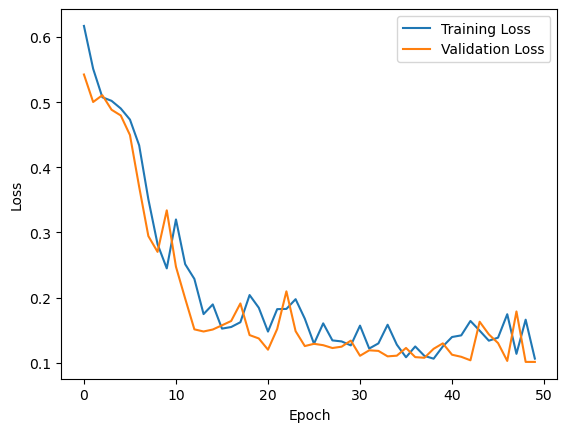

In [23]:
# Plot loss history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
y_pred = model.predict(X_val)

2/2 [==============================] - 0s 8ms/step


In [25]:
y_pred.shape

(50, 50, 1)

In [26]:
y_pred_ = []
for item in y_pred:
    y_pred_.append(item[49])

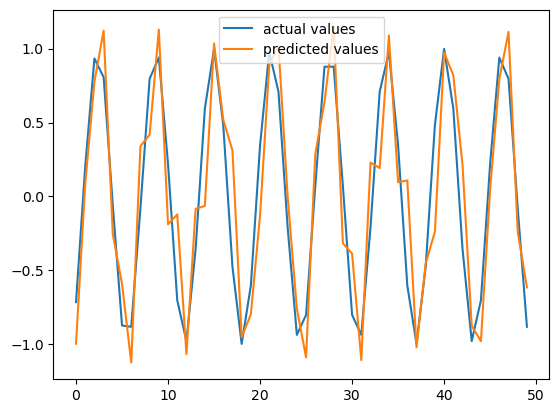

In [27]:
plt.plot(Y_val, label='actual values')
plt.plot(y_pred_, label = 'predicted values')
plt.legend()